In [6]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [7]:
df = pd.read_csv('/content/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Count'>

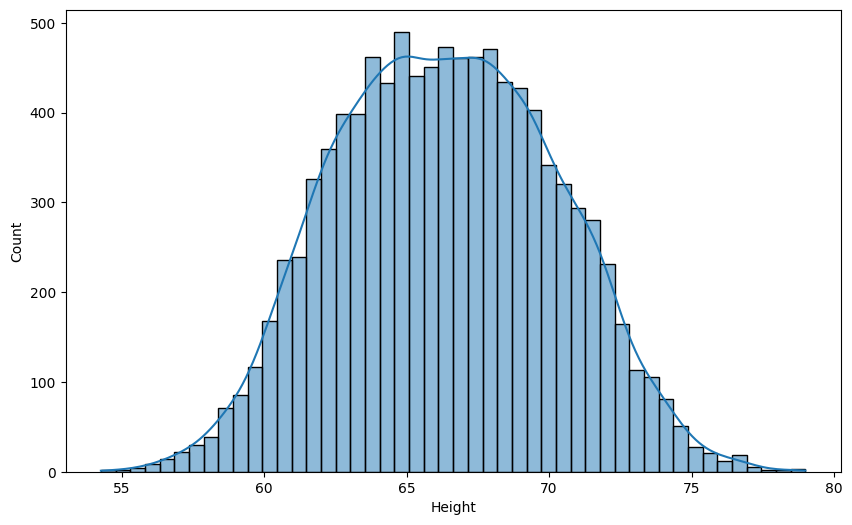

In [11]:
sns.histplot(df.Height, kde = True)

In [9]:
df.Height.quantile(0.25)

63.505620481218955

In [10]:
df.Height.quantile(0.5)

66.31807008178464

In [12]:
df.Height.std()

3.8475281207732293

In [13]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [14]:
df.Height.mean()

66.36755975482124

In [15]:
# lower fence will be mean-3*std and upper will be mean+3*std

In [16]:
lower = df.Height.mean() - (3*df.Height.std())
lower

54.82497539250156

In [17]:
upper = df.Height.mean() + (3*df.Height.std())
upper

77.91014411714093

In [19]:
df[df.Height<lower]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [20]:
df[df.Height>upper]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [21]:
df[(df.Height<lower) | (df.Height>upper)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [22]:
df_no_outliers = df[(df.Height>lower) & (df.Height<upper)]
df_no_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [30]:
df.shape[0] - df_no_outliers.shape[0]

7

<Axes: xlabel='Height', ylabel='Count'>

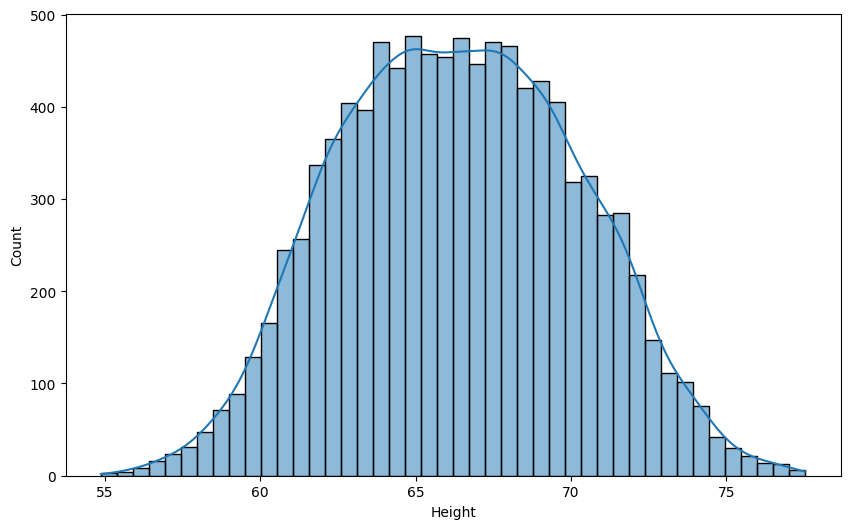

In [32]:
sns.histplot(df_no_outliers.Height, kde = True)

In [33]:
# Outliers detection using z-Score

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [46]:
from scipy import stats
z_mit_stats = stats.zscore(df.Height)
print(z_mit_stats.sum())
print(z_mit_stats.mean())
print(z_mit_stats.std())
print(z_mit_stats.describe())


2.2737367544323206e-12
2.2737367544323206e-16
1.0000500037503124
count    1.000000e+04
mean     2.273737e-16
std      1.000050e+00
min     -3.146184e+00
25%     -7.438756e-01
50%     -1.286336e-02
75%      7.295183e-01
max      3.283099e+00
Name: Height, dtype: float64


In [48]:
zscore_formula = (df.Height - df.Height.mean()) / df.Height.std()
zscore_formula
print(zscore_formula.sum())
print(zscore_formula.mean())
print(zscore_formula.std())
print(zscore_formula.describe())

2.2737367544323206e-12
2.2737367544323206e-16
0.9999999999999999
count    1.000000e+04
mean     2.273737e-16
std      1.000000e+00
min     -3.146027e+00
25%     -7.438384e-01
50%     -1.286272e-02
75%      7.294819e-01
max      3.282934e+00
Name: Height, dtype: float64


In [49]:
df['zscore_formula'] = (df.Height - df.Height.mean()) / df.Height.std()

In [51]:
df['z_mit_stats'] = stats.zscore(df.Height)

In [52]:
df.head()

,Gender,Height,Weight,zscore_formula,z_mit_stats
0,Male,73.847017,241.893563,1.943964,1.944061
1,Male,68.781904,162.310473,0.627505,0.627537
2,Male,74.110105,212.740856,2.012343,2.012443
3,Male,71.730978,220.042470,1.393991,1.394060
4,Male,69.881796,206.349801,0.913375,0.913421


In [53]:
# if zscore is in between -3 and 3 then the 99.7 % data are in this range

In [54]:
df[df.zscore_formula > 3]

,Gender,Height,Weight,zscore_formula,z_mit_stats
994,Male,78.095867,255.690835,3.048271,3.048423
1317,Male,78.462053,227.342565,3.143445,3.143602
2014,Male,78.998742,269.989699,3.282934,3.283099
3285,Male,78.528210,253.889004,3.160640,3.160798
3757,Male,78.621374,245.733783,3.184854,3.185013


In [55]:
df[df.zscore_formula < -3]

,Gender,Height,Weight,zscore_formula,z_mit_stats
6624,Female,54.616858,71.393749,-3.054091,-3.054244
9285,Female,54.263133,64.700127,-3.146027,-3.146184


In [60]:
df_no_out = df[(df.zscore_formula < 3) & (df.zscore_formula > -3)]
df_no_out

,Gender,Height,Weight,zscore_formula,z_mit_stats
0,Male,73.847017,241.893563,1.943964,1.944061
1,Male,68.781904,162.310473,0.627505,0.627537
2,Male,74.110105,212.740856,2.012343,2.012443
3,Male,71.730978,220.042470,1.393991,1.394060
4,Male,69.881796,206.349801,0.913375,0.913421
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,-0.050660
9996,Female,67.067155,170.867906,0.181830,0.181839
9997,Female,63.867992,128.475319,-0.649655,-0.649688
9998,Female,69.034243,163.852461,0.693090,0.693125


In [63]:
df.shape , df_no_out.shape

((10000, 5), (9993, 5))

In [64]:
df.shape[0] - df_no_out.shape[0]

7

<Axes: xlabel='Height', ylabel='Count'>

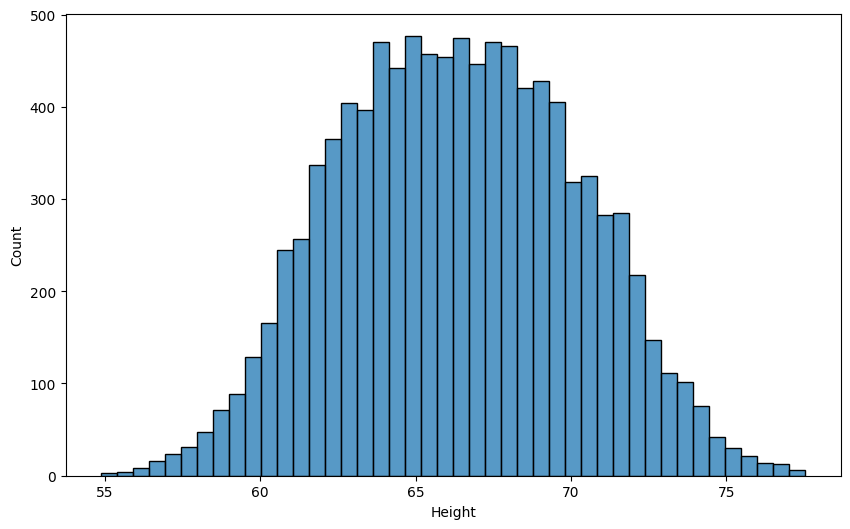

In [66]:
sns.histplot(df_no_out.Height)

<Axes: xlabel='zscore_formula', ylabel='Count'>

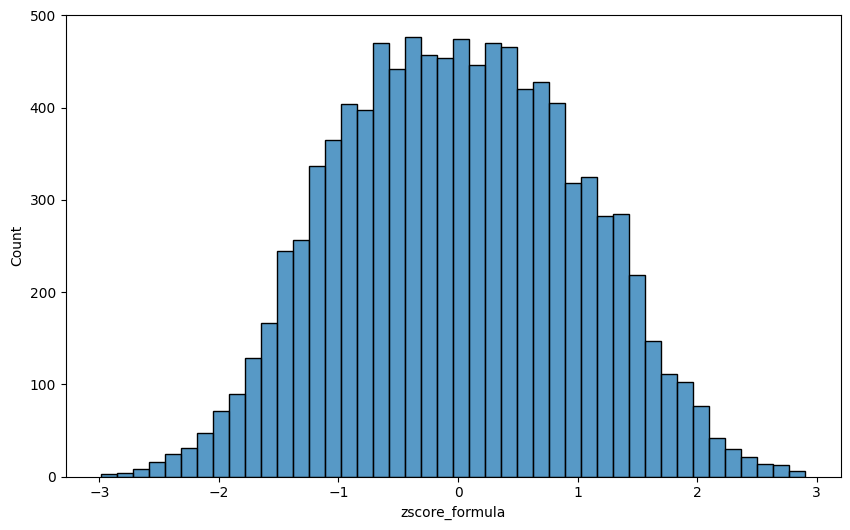

In [67]:
sns.histplot(df_no_out.zscore_formula)